# Mapas de difusão

* Grafos
* Matriz de adjacência e grau
* Grafo Laplaciano
* Corte normalizado
* Matriz de Afinidade
* Passeios aleatórios
* Mapas de Difusão
* Exemplos e comparação com PCA


## Representação matricial de um grafo

Um grafo $G = (V, E)$ pode ser reprensentado por uma matriz $A$, $n \times n$ com $n = |V|$, da seguinte forma:


\begin{equation}
A_{ij} = 1 \quad\text{se}\quad (i, j) \in E \\
\quad 0 \quad\text{c.c.}
\end{equation}

A matriz $A$ é chamada de matriz de adjacência pois indica se dois vértices são adjacentes.
Note que se o grafo é não direcionado a matriz $A$ é simétrica pois tanto $(i, j)$ quanto $(j, i)$ pertencem a $E$.

Em seguida podemos definir a matriz diagonal grau $D$ cuja entrada $D_{ii}$ é o grau do vértice $i$.

\begin{equation}
D_{ii} = \sum_{j} A_{ij} 
\end{equation}

Se o grafo $G$ possui arestas com pesos, substituimos a primeira equação por $A_{ij} = w_{ij}$, onde $w_{ij}$ é o peso da aresta ou zero caso não exista a aresta $(i,j)$.

## Laplaciano de um grafo

O laplaciano de um grafo é definido como

\begin{equation}
L = D - A
\end{equation}

A matriz $L$ recebe este nome pois ela pode ser interpretada como um caso do operador discreto de Laplace, suponha que $\phi$ descreva a distribuição de calor no grafo, temos


$$
\frac{d\phi}{dt} = -k \sum_j A_{ij}(\phi_i - \phi_j)
$$

fazendo algumas transformações temos

$$
\frac{d\phi}{dt} = -k (D - A)\phi = -kL\phi
$$


Como a equação toma a mesma forma da equação do calor $\frac{du}{dt} = \alpha\nabla^2u$, com $-L$ sendo o operador de laplace, chamamos este de laplaciano do grafo.

A partir do laplaciano de um grafo podemos extrair informações interessantes sobre a estrutura do grafo.

## Cortes de um grafo

Um corte em um grafo é uma partição dos vertices em conjuntos disjuntos. Em geral um corte busca minimizar alguma propriedade dada as partições.

Por exemplo, o corte minimo de um grafo minimiza o peso das arestas entre as partições.

Um tipo de corte que é interessante para nos, é o corte normalizado que busca tambem minimizar as arestas entre as partições mas de certa forma que a partições tenham uma forte conexão internamente.

Dadas duas partições $A$ e $B$ um corte normalizado minimiza a seguinte equação

$$
\text{ncut}(A, B) = \frac{w(A, B)}{w(A, V)} + \frac{w(A, B)}{w(B, V)}
$$

onde 
$$
w(X, Y) = \sum_{i \in X, j \in Y} w_{ij}
$$.

Note que a ideia do corte fica muito mais clara se escrevemos $w(A, V) = w(A, A) + w(A, B)$ e $w(B, V) = w(B, B) + w(A, B)$.

Pode se mostrar que a solução do corte é dada por

$$
\min \text{ncut}(A, B) = \frac{\mathbf{y}^\top L \mathbf{y}}{\mathbf{y}^\top D \mathbf{y}}
$$

sujeito a

$$
y_i \in \left\{1, -b\right\}, \quad b = cte
$$
$$
\mathbf{y}^\top D \mathbb{1} = 0
$$

Este problema é NP-hard mas se relaxarmos a solução $\mathbf{y}$ para ter valores nos reais, temos um problema de autovalor-autovetor

$$
L \mathbf{y} = \lambda D \mathbf{y}
$$


Por fim, podemos usar o sinal de $y_i$ para determinar se o vértice $i$ pertence a partição $A$ ou $B$.

## Matriz de afinidade

Até o momento descrevemos como representar um grafo matricialmente, o que é um corte e mostramos a relação do corte normalizado com o laplaciano de um grafo.

A questão importante no entanto, que não foi respondida ainda, é como usamos essas ferramentas para aplicar machine learning.


O conceito que faz a ponte entre grafos e machine learning é considerar que um conjunto de dados é um grafo onde as amostras são os vértices e o peso das arestas entre os vértices é dado por alguma medida de afinidade (ou similaridade) entre as amostras.



Definimos então uma função kernel $k$, simétrica e positiva definida

$$
k(\mathbf{x}, \mathbf{y}) = exp\left(\frac{-\lVert\mathbf{x} - \mathbf{y}\rVert ^2}{\epsilon^2}\right)
$$

onde o parametro $\epsilon$ define o tamanho da vizinhança de afinidade.

Logo temos a matriz de afinidade para um conjunto de dados $X$

$$
A_{ij} = k(\mathbf{x}_i, \mathbf{x}_j), \quad \mathbf{x}_i, \mathbf{x}_j \in X
$$

Note que esta matriz é bem semelhante a matriz de adjacência. Com isso já é possível aplicar o corte normalizado aos dados, obtendo um método (não supervisionado) de clusterização.

## Passeios aleatórios

Suponha agora que desejamos considerar afinidades de maior ordem, isto é, afinidades indiretas. Por exemplo, se $x$ tem afinidade com $y$ e $y$ tem afinidade com $z$ então $x$ tem afinidade com $z$

Podemos pensar no nosso grafo como uma cadeia de Markov e que com o tempo $t$ as probabilidades de transição (relativas à afinidade) difundem a vértices vizinhos (com grande afinidade).

Assim chegamos a matriz de Markov $P$ 
$$
P = D^{-1}A
$$

e $P^t$ nos dá as probabilidades de transição para um determinado tempo de difusão $t$.


## Mapas de difusão

O método dos mapas de difusão se baseia na construção da matriz $P$ e suas potências, dai o plural "mapas" pois para cada $t$ temos um mapa diferente dos dados em escalas diferentes.

Podemos ver o método como uma "mudança de base" dos dados de forma que a nova base é definida a partir dos proprios dados. 
Note que "mudança de base" está entre aspas pois esta transformação não é uma mudança de base no sentido classico.
No entanto ao escrever mudança de base remetemos ao uso do método PCA, por isso será feita uma comparação entre ambos os métodos posteriormente.

Ao olhar para as linhas da matriz $P$ podemos ver esta como cuma transformação dos nosso dados, ao invés de uma amostra ser representada por valores absolutos, $\mathbf{x}_i$, representamos ele por $p_i$ sua afinidade (ou relação) com o resto dos dados, que dizer $i$-ésima linha da matriz $P$.

Observe que essa representação é bem interessante pois ignora fatores como rotações e escala dos dados.

Introduzimos então as distâncias de difusão

$$
D(\mathbf{x}_i, \mathbf{x}_j)^2 = \lVert p_i - p_j\rVert ^2
$$

mas note que podemos escrever o lado esquerdo em termos dos autovalores $\lambda_i$ e autovetores $\mathbf{v}_i$ de $P$

$$
D(\mathbf{x}_i, \mathbf{x}_j)^2 = \lVert p_i - p_j\rVert ^2 = \sum_k \lambda_k \lVert v_k(i) - v_k(j)\rVert ^2
$$



E assim podemos definir uma imersão dos dados que aproxima a distância de difusão truncando a equação acima aos primeiros $n$ autovalores de maior norma

$$
\mathbf{x}_i \mapsto \left\{\lambda_1 v_1(i), \cdots, \lambda_n v_n(i)\right\}
$$

Ao escolher $n$ menor que a dimensão dos dados obtemos uma redução de dimensionalidade ótima no sentido de que esta é a melhor aproximação da distancia de difusão original.

### Implementação

In [1]:
from scipy.spatial import distance_matrix
from scipy.spatial.distance import cdist
from sklearn.preprocessing import normalize
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt


from sklearn.metrics import pairwise_distances
class DiffusionMaps:
    def __init__(self, metric = 'euclidean'):
        self.metric = metric;

    def fit(self, X, eps):
        self.X = X.copy()
        self.eps = eps;
        D = pairwise_distances(X, metric=self.metric)
        E = np.exp(-(D * D) / (eps**2))
        P = normalize(E, axis=1, norm='l1')
        e, V = np.linalg.eig(P)
        idx = np.argsort(e.real)
        e = e.real[idx[::-1]]
        V = V.real[:, idx[::-1]]
        self.e = e
        self.V = V
        return e, V
    
    def transform(self, X):
        #D = cdist(X, self.X, 'sqeuclidean')
        D = pairwise_distances(X, self.X, metric=self.metric)
        E = np.exp(-(D * D) / (self.eps**2))
        P = normalize(E, axis=1, norm='l1')
        return P.dot(self.V).dot(np.diag(1.0 / self.e))

### Testando o mapas de difusão com o conjunto de digitos

In [2]:
from sklearn.datasets import load_digits
import math

data = load_digits()
X = data.data
lab = data.target

dm = DiffusionMaps()

e, V = dm.fit(X, 12)

#idx = np.argsort(V[:, 1])
idx = range(0, len(V[:,1]))
x = V[idx, 1]
y = V[idx, 2]
z = V[idx, 3]
w = V[idx, 4]

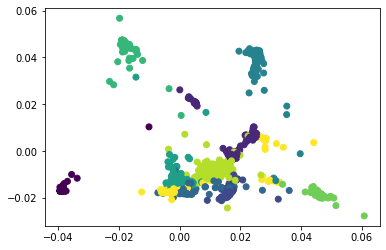

In [3]:
plt.scatter(x, y, c=lab[idx])

Text(0, 0.5, 'W')

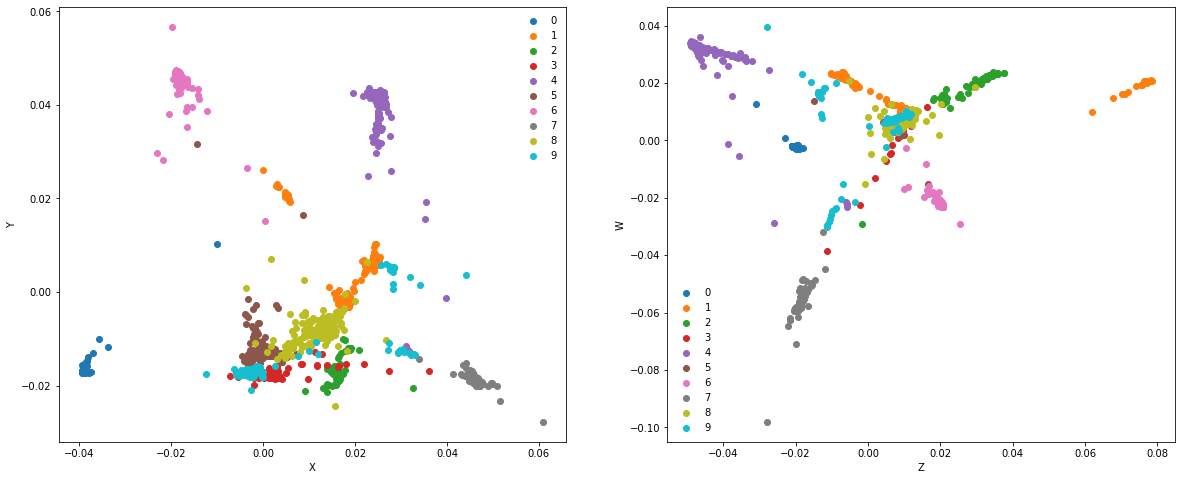

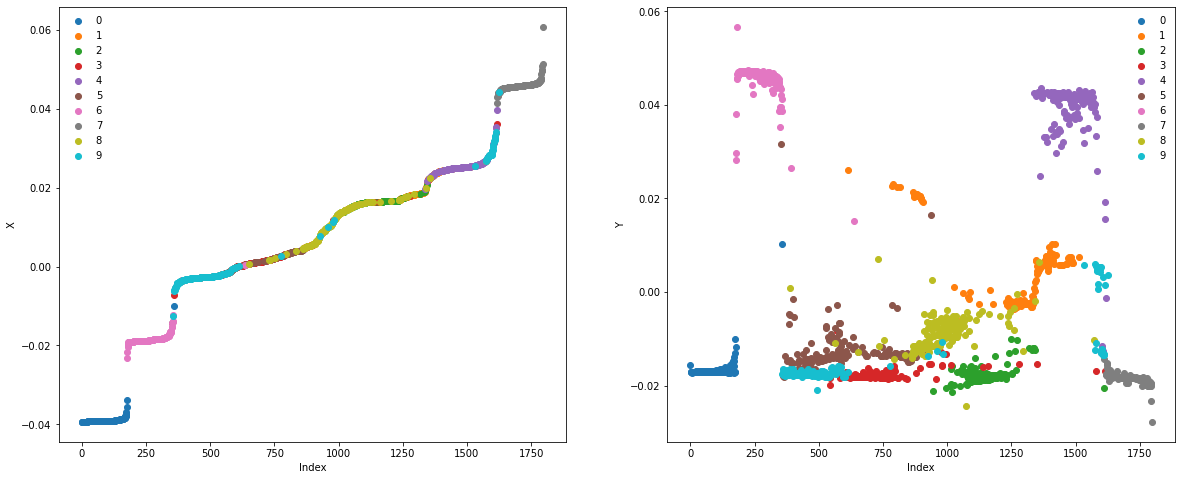

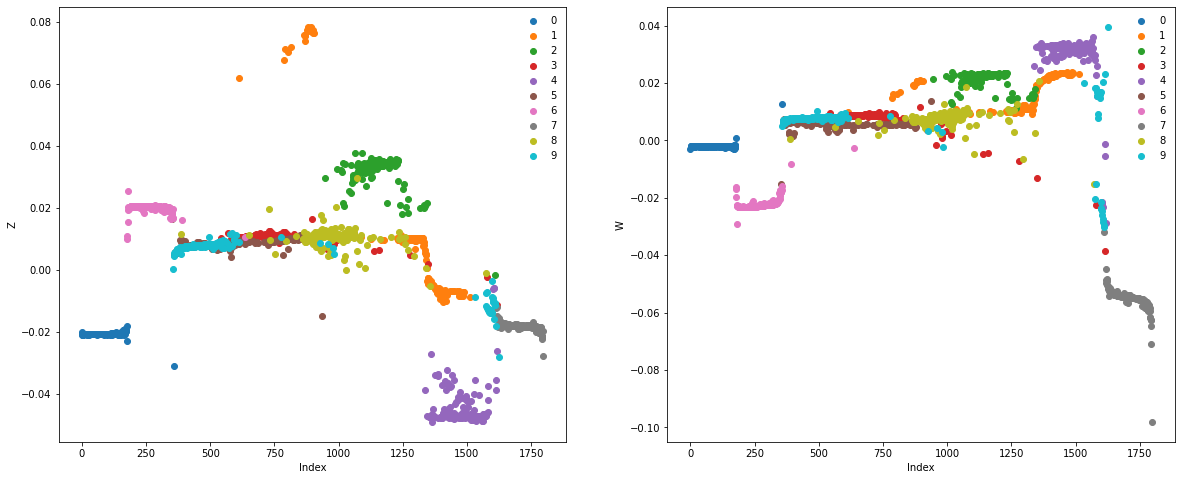

In [4]:
from matplotlib import cm

def make_scatter(x, y, lab):
    classes = np.unique(lab)
    #viridis = cm.get_cmap('viridis', len(classes))
    cmap = cm.get_cmap('tab10', len(classes))
    plt.set_cmap(cmap)
    names = map(str, classes)
    plots = []
    for c in classes:
        idx = lab == c
        color = np.array(cmap(c)).reshape(1, 4)
        p = plt.scatter(x[idx], y[idx], c=color);
        plots.append(p)
    plt.legend(plots, names, loc='best', frameon=False)


idx = np.argsort(x)
i = np.array(range(0, len(x)))
colors = lab[idx].astype(int)


plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(x, y, lab); plt.xlabel("X");plt.ylabel("Y")
plt.subplot(1, 2, 2)
make_scatter(z, w, lab); plt.xlabel("Z");plt.ylabel("W")

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(i, x[idx], colors); plt.xlabel("Index");plt.ylabel("X")
plt.subplot(1, 2, 2)
make_scatter(i, y[idx], colors); plt.xlabel("Index");plt.ylabel("Y")

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(i, z[idx], colors); plt.xlabel("Index");plt.ylabel("Z")
plt.subplot(1, 2, 2)
make_scatter(i, w[idx], colors); plt.xlabel("Index");plt.ylabel("W")

### Comparando com o PCA

Nesta seção vamos comparar visualmente a transformação dos dados assim como foi feito com o mapa de difusão.

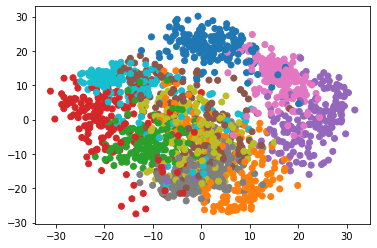

In [5]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=10)
pca.fit(X)
U = pca.transform(X)

x = U[:, 0]
y = U[:, 1]
z = U[:, 2]
w = U[:, 3]
plt.scatter(x, y, c=lab)

Text(0, 0.5, 'W')

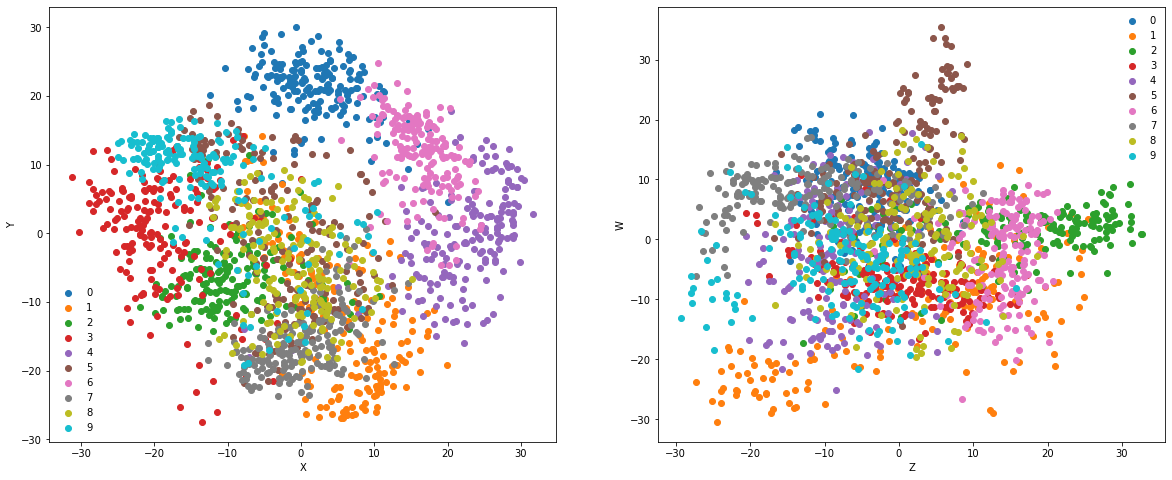

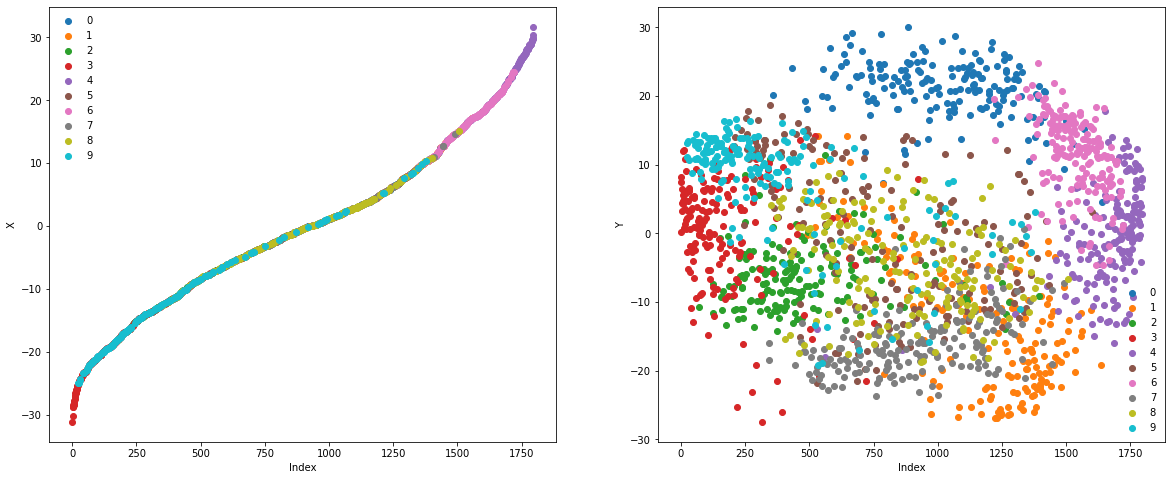

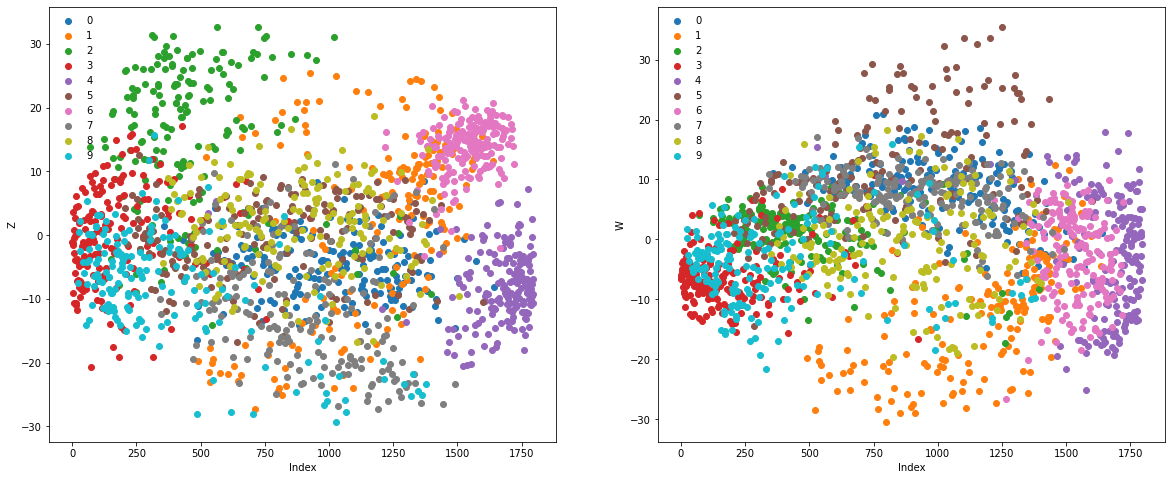

In [6]:
idx = np.argsort(x)
i = np.array(range(0, len(x)))
colors = lab[idx].astype(int)


plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(x, y, lab); plt.xlabel("X");plt.ylabel("Y")
plt.subplot(1, 2, 2)
make_scatter(z, w, lab); plt.xlabel("Z");plt.ylabel("W")

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(i, x[idx], colors); plt.xlabel("Index");plt.ylabel("X")
plt.subplot(1, 2, 2)
make_scatter(i, y[idx], colors); plt.xlabel("Index");plt.ylabel("Y")

plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)
make_scatter(i, z[idx], colors); plt.xlabel("Index");plt.ylabel("Z")
plt.subplot(1, 2, 2)
make_scatter(i, w[idx], colors); plt.xlabel("Index");plt.ylabel("W")

### Comparativo classificador usando a transformação do DM e do PCA

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(X,lab,random_state = 0)


pca = decomposition.PCA(n_components=10)
pca.fit(X_train)
U = pca.transform(X_train)

dm = DiffusionMaps()
e, V = dm.fit(X_train, 12)

ncomp = 4;
At = pca.transform(X_train)[:, range(0, ncomp)]
A = pca.transform(X_test)[:, range(0, ncomp)]
# note que no mapa de difusão nao usamos o primeiro autovetor V[:,0]
# pois este é o autovetor 1 constante para todas as entradas
# como as linhas da matriz P somam 1 entao P * [1] = 1 * [1]
Bt = dm.transform(X_train)[:, range(1, ncomp+1)]
B = dm.transform(X_test)[:, range(1, ncomp+1)]

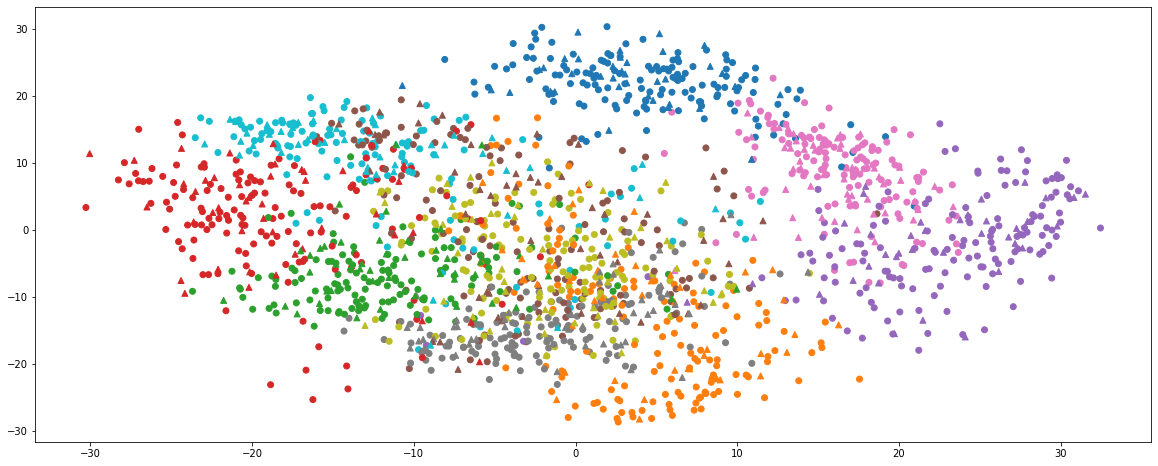

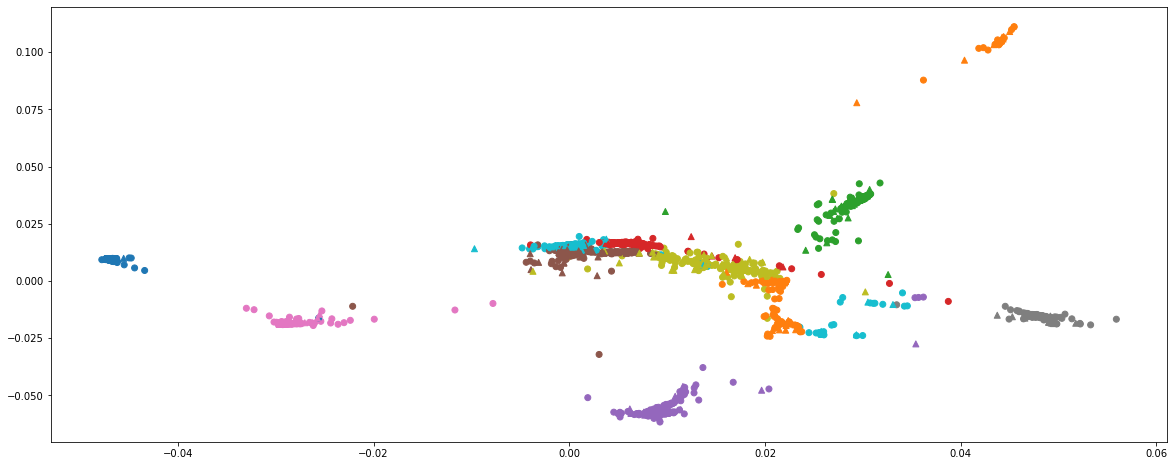

In [8]:
#plot de ambas as transformaçoes tanto dos dados de teste quanto de treino
plt.figure(figsize=(20,8))
plt.scatter(U[:, 0], U[:, 1], c=y_train)
plt.scatter(A[:, 0], A[:, 1], c=y_test, marker='^')

plt.figure(figsize=(20,8))
plt.scatter(V[:, 1], V[:, 2], c=y_train)
plt.scatter(B[:, 0], B[:, 1], c=y_test, marker='^')

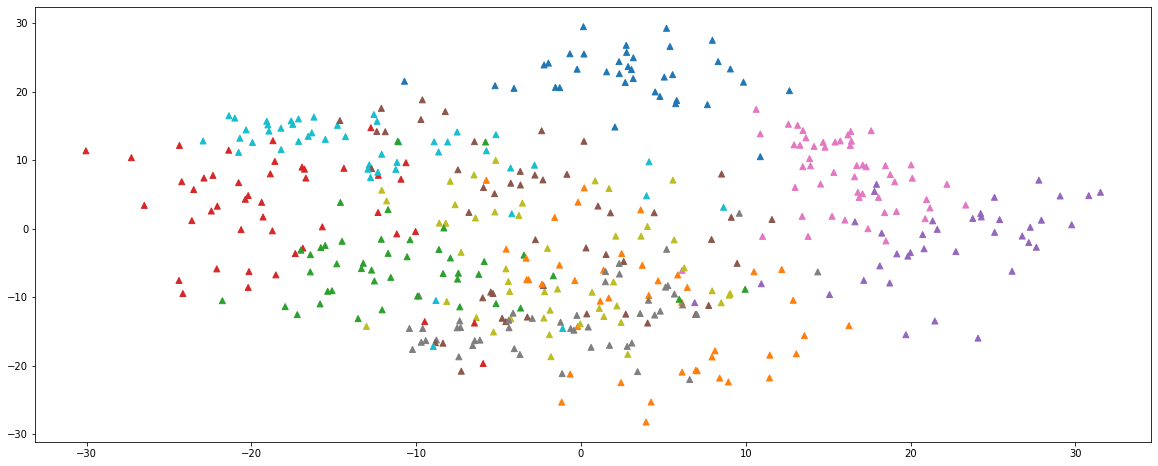

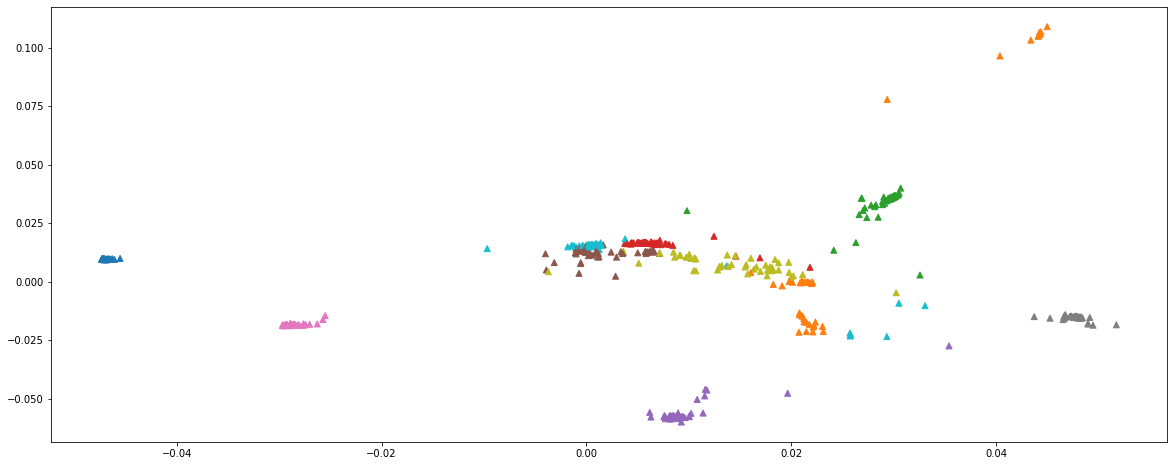

In [9]:
#plot dos dados de teste somente
plt.figure(figsize=(20,8))
plt.scatter(A[:, 0], A[:, 1], c=y_test, marker='^')

plt.figure(figsize=(20,8))
plt.scatter(B[:, 0], B[:, 1], c=y_test, marker='^')

In [10]:
# comparativo do classificador knn usando o dm e o pca

c1 = KNeighborsClassifier(n_neighbors = 5)
c2 = KNeighborsClassifier(n_neighbors = 5)

c1.fit(At, y_train)
c2.fit(Bt, y_train)
print('PCA train: {}'.format(c1.score(At, y_train)))
print('PCA test: {}'.format(c1.score(A, y_test)))

print('DM train: {}'.format(c2.score(Bt, y_train)))
print('DM test: {}'.format(c2.score(B, y_test)))

PCA train: 0.9057164068299925
PCA test: 0.8622222222222222
DM train: 0.9703043801039347
DM test: 0.9644444444444444


### Considerções sobre ambos os métodos

* PCA é um método linear enquanto o DM é não linear
* A complexidade do PCA depende da dimensão dos dados enquanto o DM depende do número de amostras
* Para obter bons resultados no DM é necessário uma boa escolha do parâmetro epsilon


Devido a essas características o PCA é eficiente quando a dimensão dos dados é pequena ou média, podendo ser aplicado rapidamente a um comjunto de dados largo.

Por outro lado o DM é mais indicado quando o conjunto de dados não é muito grande, ou pode ser subamostrado, mas em contrapartida a dimensão dos dados pode ser muito elevada sem afetar sua eficiência.

## Mais Exemplos

In [11]:
n = 200
t = np.linspace(0, 2*np.pi, n);
x = np.cos(t) * 5 + np.random.random(t.shape);
y = np.sin(t) * 5 + np.random.random(t.shape);

x2 = np.cos(t) + np.random.random(t.shape);
y2 = np.sin(t) + np.random.random(t.shape);

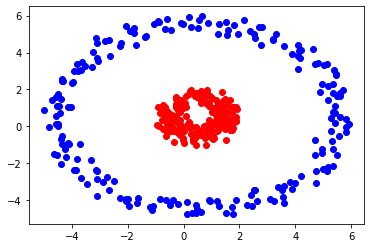

In [12]:
plt.scatter(x, y, c='b')
plt.scatter(x2, y2, c='r')

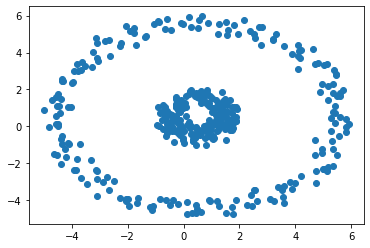

In [13]:
X = np.concatenate([x, x2])
Y = np.concatenate([y, y2])
data = np.reshape(np.concatenate([X, Y]), (2, -1)).T

plt.scatter(data[:, 0], data[:, 1])

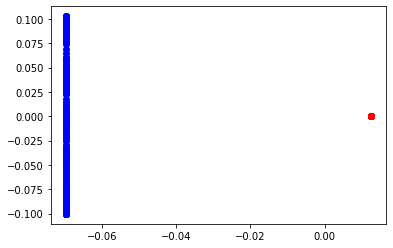

In [14]:
dm = DiffusionMaps()

dm.fit(data, 1)
V = dm.transform(data)[:, range(1, 3)]

plt.scatter(V[range(0, n), 0], V[range(0, n), 1], c='b')
plt.scatter(V[range(n, 2*n), 0], V[range(n, 2*n), 1], c='r')

### Perfis sintéticos

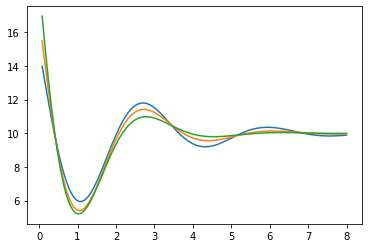

In [15]:
#função para teste, o parametro 'a' representa as diferentes curvas
def f(x, a):
    b = np.sqrt(4 - a*a)
    return 10 - 20 * a * np.exp(-a * x) * np.sin(b * x) / b + 10 * a * np.exp(-a * x) * np.cos(b * x)

x = np.linspace(0.08, 8, 100);
y5 = f(x, 0.5)
y7 = f(x, 0.7)
y9 = f(x, 0.9)

plt.plot(x, y5)
plt.plot(x, y7)
plt.plot(x, y9)

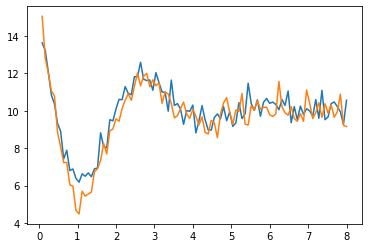

In [16]:
def make_samples(y1, y2, sigma, n1, n2):
    rows = n1 + n2
    cols = len(y1)
    data = np.zeros((rows, cols))
    for i in range(0, n1):
        data[i, :] = y1 + np.random.normal(0, sigma, (1, cols))
    for i in range(n1, n1 + n2):
        data[i, :] = y2 + np.random.normal(0, sigma, (1, cols))
        
    return data

n1 = 90
n2 = 10
sigma = 0.5
data = make_samples(y5, y7, sigma, n1, n2)

plt.plot(x, data[0, :])
plt.plot(x, data[-1, :])

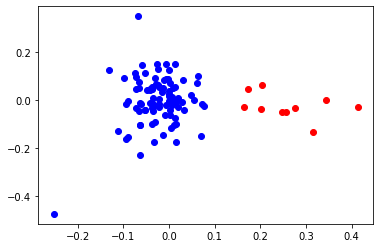

In [17]:
dm = DiffusionMaps()

dm.fit(data, 5)
V = dm.transform(data)[:, range(1, 3)]

plt.scatter(V[range(0, n1), 0], V[range(0, n1), 1], c='b')
plt.scatter(V[range(n1, n1+n2), 0], V[range(n1, n1+n2), 1], c='r')

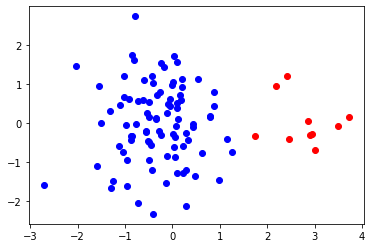

In [18]:
pca = decomposition.PCA(n_components=2)

pca.fit(data)
V = pca.transform(data)

plt.scatter(V[range(0, n1), 0], V[range(0, n1), 1], c='b')
plt.scatter(V[range(n1, n1+n2), 0], V[range(n1, n1+n2), 1], c='r')

## Working with texts

In [24]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.feature_extraction.text import TfidfVectorizer

# data = pd.read_csv('./Data/spam.csv')
# data['y'] = data['target'] == 'spam'

# X = data['text']
# y = data['y']


# X_train, X_test, y_train, y_test = train_test_split(X, y)
# cv = CountVectorizer(stop_words='english').fit(X_train)
# tv = TfidfVectorizer(stop_words='english').fit(X_train)

In [25]:
# A = cv.transform(X_train)
# B = cv.transform(X_test)

# dm = DiffusionMaps()

# eps = 50
# e, V = dm.fit(A.astype(float), eps)

In [26]:
# Va = dm.transform(A.astype(float))[:, range(1, 21)]
# Vb = dm.transform(B.astype(float))[:, range(1, 21)]
# plt.figure(figsize=(20,8))
# plt.subplot(1, 3, 1)
# plt.scatter(Va[:, 0], Va[:, 1], c=y_train)
# plt.subplot(1, 3, 2)
# plt.scatter(Va[:, 2], Va[:, 3], c=y_train)
# plt.subplot(1, 3, 3)
# plt.scatter(Va[:, 4], Va[:, 5], c=y_train)

In [27]:
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import roc_auc_score

# clf = MultinomialNB().fit(A, y_train)
# pred = clf.predict(B)

# print('MNB', roc_auc_score(y_test, pred))

In [28]:
# c1 = KNeighborsClassifier(n_neighbors = 5)

# n = 4
# c1.fit(Va[:, range(0,n)], y_train)
# pred = c1.predict(Vb[:, range(0, n)])

# print('DM test: {}'.format(roc_auc_score(y_test, pred)))

## Topic Modeling?

In [34]:
# import pickle
# from sklearn.feature_extraction.text import TfidfTransformer

# with open('./Data/newsgroups.json', 'rb') as f:
#     newsgroup_data = pickle.load(f)
    
# cv = CountVectorizer(min_df=20, max_df=0.2, stop_words='english', 
#                        token_pattern='(?u)\\b\\w{3,}\\b')
# tfidf = TfidfTransformer()


# X = cv.fit_transform(newsgroup_data)
# Xtf = tfidf.fit_transform(X)

In [35]:
# dm = DiffusionMaps(metric = 'cosine')

# eps = 0.5 #400
# e, V = dm.fit(Xtf.astype(float), eps)
# Vn = V[:, range(1, 7)]

# plt.figure(figsize=(20,8))
# plt.subplot(1, 3, 1)
# plt.scatter(Vn[:, 0], Vn[:, 1])
# plt.subplot(1, 3, 2)
# plt.scatter(Vn[:, 2], Vn[:, 3])
# plt.subplot(1, 3, 3)
# plt.scatter(Vn[:, 4], Vn[:, 5])